In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

TensorFlow 2.x selected.


In [0]:
# Loading the data
dataset = load_iris()

In [0]:
# Dataset has 4 features
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
# Target Classes
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
# Getting categorical target data, also dropping first column to get rid of dummy variable trap. 
target = pd.Series(dataset.target)
target = pd.get_dummies(target, drop_first = True)
# Alse get the shapes
N, D = dataset.data.shape

In [0]:
# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(dataset.data, target, test_size = .3)

In [0]:
# Normalization (?) Should I use it? I don't know
# scaler = StandardScaler()
# X_test = scaler.fit_transform(X_test)
# X_train = scaler.fit_transform(X_train)

105/105 [==============================] - 0s 91us/sample - loss: 0.2282 - accuracy: 0.9524
Train score: [0.2281680179493768, 0.95238096]
45/45 [==============================] - 0s 101us/sample - loss: 0.2669 - accuracy: 0.9778
Test score: [0.26690717935562136, 0.9777778]


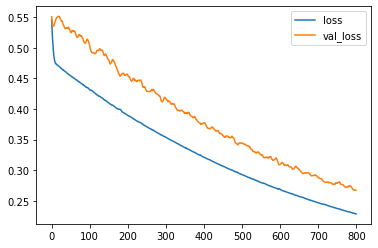

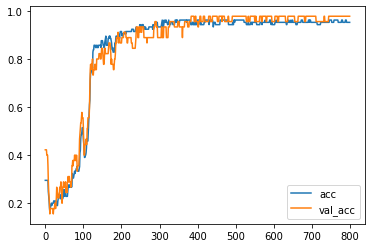

In [0]:
# Creating the sequential instance with Dense layer
# the first parameter is 'units' which is dimensionality of the output space. The is 
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation = "sigmoid", input_shape = (D,))
])

# Compiling model using categorical cross entropy
# From the source below, I thought using categorical cross entropy would fit better to dataset since I believe the problem is multi-class classification problem.
# https://stats.stackexchange.com/questions/260505/should-i-use-a-categorical-cross-entropy-or-binary-cross-entropy-loss-for-binary
# @jeongmin.cha 
model.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

# I tried different number of epochs and after trying from 100 to 1000. Loss and accuracy graphs doesn't change much if epoch > 800 so I think 800 is good.  
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 800, verbose = 0)
print('Train score:', model.evaluate(X_train,y_train))
print('Test score:', model.evaluate(X_test,y_test))

# Let's plot the results
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()